In [8]:
import h5py
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold,RepeatedKFold, GridSearchCV,  RandomizedSearchCV
import math

import seaborn as sns
import pandas as pd
from itertools import islice

import splat
import splat.plot as splot
import splat.photometry as sphot
import splat.empirical as spem

In [9]:
#importing data
spectraldata = "/Users/malina/python_codes/spectral_templates_data_version_june20.h5"

pd.read_hdf(spectraldata, key = "binaries")

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,system_type
0,0.568345,0.615487,0.668477,0.705189,0.698754,0.700950,0.717146,0.704941,0.707754,0.723033,...,0.209508,0.203912,0.205196,0.201559,0.207766,0.209226,0.214793,16.0,16.0,16.0
1,0.496365,0.563067,0.602393,0.659527,0.682808,0.676481,0.674343,0.689054,0.676825,0.670386,...,0.213932,0.207528,0.206223,0.201853,0.205284,0.206424,0.206224,16.0,17.0,16.0
2,0.520227,0.580531,0.627045,0.645281,0.665795,0.678923,0.686509,0.685623,0.674414,0.702066,...,0.187648,0.184240,0.177598,0.175445,0.175319,0.181286,0.176042,16.0,16.0,16.0
3,0.483774,0.556865,0.603915,0.641451,0.698212,0.728678,0.666010,0.671234,0.659358,0.688617,...,0.233598,0.225866,0.234960,0.214639,0.219380,0.224144,0.224282,16.0,16.0,16.0
4,0.434787,0.504214,0.543165,0.611378,0.659270,0.680497,0.663214,0.634306,0.645955,0.654454,...,0.218515,0.209248,0.202981,0.198711,0.201315,0.201008,0.202865,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110809,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.000636,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,38.0,38.0
110810,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.001543,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,39.0,38.0
110848,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,0.003452,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,38.0,38.0
110849,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.000068,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,38.0,39.0,39.0


In [10]:
#defining locations

python_codes = '/Users/malina/python_codes/'
spectraldata = "spectral_templates_data_version_june20.h5"
singles = pd.read_hdf(python_codes + spectraldata , key='singles')
binaries = pd.read_hdf(python_codes + spectraldata, key = 'binaries')
wavelengths = pd.read_hdf(python_codes + spectraldata , key= 'wavegrid')

In [11]:
print(singles)

       flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0    0.494552  0.566051  0.614045  0.661532  0.686862  0.693291  0.702654   
1    0.634512  0.657556  0.714886  0.740784  0.703573  0.701638  0.724311   
2    0.493893  0.550069  0.571380  0.647315  0.666165  0.634119  0.608750   
3    0.527926  0.576912  0.620860  0.613389  0.629185  0.647721  0.653567   
4    0.462815  0.535964  0.581080  0.607863  0.694902  0.748792  0.615324   
..        ...       ...       ...       ...       ...       ...       ...   
431 -0.004027 -0.007743 -0.004455  0.005451  0.001937 -0.002612  0.002762   
432  0.008489  0.009103 -0.001436  0.010861  0.008182  0.012516  0.011853   
433 -0.004778  0.078588  0.011728 -0.005535  0.033752  0.007601 -0.034531   
434  0.073008  0.009225 -0.005804 -0.039170 -0.014236 -0.015112  0.038132   
435  0.001837 -0.014860 -0.004494  0.012385 -0.003599 -0.001110  0.012853   

       flux_7    flux_8    flux_9  ...  flux_433  flux_434  flux_435  \
0  

In [12]:
#draw any number of binaries from data

def draw_random_binaries_stars(n=400):
    binaries = pd.read_hdf(python_codes+spectraldata, key='binaries')
    binaries = binaries.sample(n)
    return binaries

In [13]:
df_binaries= draw_random_binaries_stars(n=400)

In [14]:
print(df_binaries)

          flux_0    flux_1    flux_2    flux_3    flux_4        flux_5  \
107642  0.011081  0.003436  0.016142  0.012184  0.022270  7.281500e-03   
13321   0.266197  0.329251  0.424645  0.464836  0.503595  5.487876e-01   
70062   0.101194  0.110558  0.109467  0.117754  0.126754  1.279868e-01   
31343   0.213955  0.238340  0.226224  0.282070  0.297282  3.210550e-01   
99438   0.017469  0.050816  0.033335  0.037388  0.017224 -1.102278e-14   
...          ...       ...       ...       ...       ...           ...   
27940   0.194770  0.211455  0.246362  0.299772  0.341877  3.607744e-01   
62214   0.090344  0.077593  0.085455  0.105542  0.105734  1.315283e-01   
56712   0.102998  0.106865  0.119871  0.130157  0.147147  1.673522e-01   
8372    0.375303  0.427225  0.503249  0.543427  0.564745  5.413624e-01   
106075 -0.005222 -0.020252  0.029270 -0.008645 -0.011612  2.747520e-02   

          flux_6    flux_7    flux_8    flux_9  ...  flux_434  flux_435  \
107642  0.007790  0.000888  0.005926

In [15]:
df_singles = singles
df_wavelengths = wavelengths

In [16]:
print(df_wavelengths)

     wavelength
0      0.801448
1      0.804246
2      0.807063
3      0.809900
4      0.812757
..          ...
436    2.387420
437    2.390210
438    2.393000
439    2.395790
440    2.398570

[441 rows x 1 columns]


<AxesSubplot:ylabel='Frequency'>

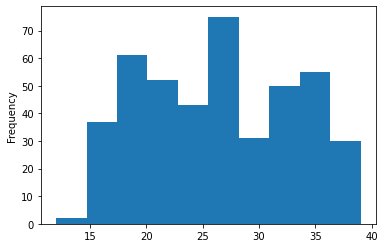

In [17]:
# visualizing data

df_singles.spectral_type.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

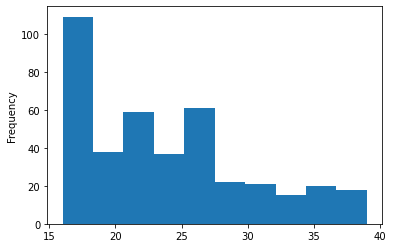

In [18]:
df_binaries.system_type.plot(kind = 'hist')

In [19]:
# change column names

df_newbinaries = df_binaries.rename(columns = {'system_type':'spectral_type'})
print(df_newbinaries)

          flux_0    flux_1    flux_2    flux_3    flux_4        flux_5  \
107642  0.011081  0.003436  0.016142  0.012184  0.022270  7.281500e-03   
13321   0.266197  0.329251  0.424645  0.464836  0.503595  5.487876e-01   
70062   0.101194  0.110558  0.109467  0.117754  0.126754  1.279868e-01   
31343   0.213955  0.238340  0.226224  0.282070  0.297282  3.210550e-01   
99438   0.017469  0.050816  0.033335  0.037388  0.017224 -1.102278e-14   
...          ...       ...       ...       ...       ...           ...   
27940   0.194770  0.211455  0.246362  0.299772  0.341877  3.607744e-01   
62214   0.090344  0.077593  0.085455  0.105542  0.105734  1.315283e-01   
56712   0.102998  0.106865  0.119871  0.130157  0.147147  1.673522e-01   
8372    0.375303  0.427225  0.503249  0.543427  0.564745  5.413624e-01   
106075 -0.005222 -0.020252  0.029270 -0.008645 -0.011612  2.747520e-02   

          flux_6    flux_7    flux_8    flux_9  ...  flux_434  flux_435  \
107642  0.007790  0.000888  0.005926

In [13]:
#checking for NANS

df_newbinaries.isnull().values.any()

False

In [35]:
df_flux = df_newbinaries.drop('primary_type', axis = 1).drop('spectral_type', axis = 1).drop('secondary_type', axis = 1)
print(df_flux)

          flux_0    flux_1    flux_2    flux_3    flux_4        flux_5  \
107642  0.011081  0.003436  0.016142  0.012184  0.022270  7.281500e-03   
13321   0.266197  0.329251  0.424645  0.464836  0.503595  5.487876e-01   
70062   0.101194  0.110558  0.109467  0.117754  0.126754  1.279868e-01   
31343   0.213955  0.238340  0.226224  0.282070  0.297282  3.210550e-01   
99438   0.017469  0.050816  0.033335  0.037388  0.017224 -1.102278e-14   
...          ...       ...       ...       ...       ...           ...   
27940   0.194770  0.211455  0.246362  0.299772  0.341877  3.607744e-01   
62214   0.090344  0.077593  0.085455  0.105542  0.105734  1.315283e-01   
56712   0.102998  0.106865  0.119871  0.130157  0.147147  1.673522e-01   
8372    0.375303  0.427225  0.503249  0.543427  0.564745  5.413624e-01   
106075 -0.005222 -0.020252  0.029270 -0.008645 -0.011612  2.747520e-02   

          flux_6    flux_7    flux_8    flux_9  ...  flux_431  flux_432  \
107642  0.007790  0.000888  0.005926

In [37]:
# adding noise

n1, n2 = 0, 0.1
noise = np.random.normal(n1, n2, [400, 441]) 
print(noise)

[[ 0.11641633 -0.02496556 -0.28965263 ... -0.21082609  0.03928121
   0.05197054]
 [ 0.02194182  0.10741534  0.09674473 ... -0.07777271 -0.14622271
  -0.07361457]
 [-0.171174   -0.08948578  0.08025462 ... -0.02962797  0.04008112
   0.00674405]
 ...
 [-0.09607558  0.09070867  0.09572836 ...  0.08909309  0.05922081
  -0.13159436]
 [ 0.01524194  0.03680168  0.09515165 ... -0.06328733 -0.06050019
  -0.09329549]
 [-0.11762089 -0.10332388 -0.10529824 ...  0.07296116 -0.043855
   0.2723062 ]]


In [38]:
noisyflux = df_flux + noise
print(noisyflux)

          flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
107642  0.127498 -0.021530 -0.273511  0.183523  0.055911 -0.080545 -0.237266   
13321   0.288139  0.436667  0.521389  0.537337  0.553316  0.464745  0.412005   
70062  -0.069980  0.021072  0.189721  0.153894  0.180276  0.157888  0.138098   
31343   0.161574  0.333118  0.232341  0.196156  0.357116  0.091771  0.400862   
99438   0.035634  0.147561 -0.008879 -0.070835  0.127021  0.047656  0.050028   
...          ...       ...       ...       ...       ...       ...       ...   
27940   0.137639  0.154319  0.280926  0.235853  0.314216  0.305022  0.289480   
62214   0.218526  0.078710  0.122460  0.124071  0.062302  0.037002  0.057156   
56712   0.006922  0.197574  0.215600  0.020432 -0.070672  0.212444  0.051935   
8372    0.390545  0.464026  0.598401  0.407354  0.425414  0.593776  0.816579   
106075 -0.122843 -0.123576 -0.076028  0.006357  0.076021  0.211873  0.120650   

          flux_7    flux_8    flux_9  .

In [39]:
df_singles["binary"] = 0
df_newbinaries["binary"] = 1

In [40]:
frames = [df_singles, df_newbinaries]
result = pd.concat(frames)
print(result)

          flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0       0.494552  0.566051  0.614045  0.661532  0.686862  0.693291  0.702654   
1       0.634512  0.657556  0.714886  0.740784  0.703573  0.701638  0.724311   
2       0.493893  0.550069  0.571380  0.647315  0.666165  0.634119  0.608750   
3       0.527926  0.576912  0.620860  0.613389  0.629185  0.647721  0.653567   
4       0.462815  0.535964  0.581080  0.607863  0.694902  0.748792  0.615324   
...          ...       ...       ...       ...       ...       ...       ...   
27940   0.194770  0.211455  0.246362  0.299772  0.341877  0.360774  0.354250   
62214   0.090344  0.077593  0.085455  0.105542  0.105734  0.131528  0.153234   
56712   0.102998  0.106865  0.119871  0.130157  0.147147  0.167352  0.180600   
8372    0.375303  0.427225  0.503249  0.543427  0.564745  0.541362  0.545514   
106075 -0.005222 -0.020252  0.029270 -0.008645 -0.011612  0.027475  0.017469   

          flux_7    flux_8    flux_9  .

In [41]:
from sklearn.model_selection import train_test_split
RSEED = 42  

feats = list(result.columns)
feats.remove('object_name')
feats.remove('primary_type')
feats.remove('secondary_type')

x0 = np.array(result[feats])
y0 = np.array(result['binary'])

print(x0)

[[ 4.94552101e-01  5.66050609e-01  6.14045310e-01 ...  2.02379067e-01
   1.60000000e+01  0.00000000e+00]
 [ 6.34512185e-01  6.57555963e-01  7.14885540e-01 ...  2.24777620e-01
   1.20000000e+01  0.00000000e+00]
 [ 4.93893309e-01  5.50069266e-01  5.71380034e-01 ...  2.11448315e-01
   1.50000000e+01  0.00000000e+00]
 ...
 [ 1.02997548e-01  1.06865172e-01  1.19871304e-01 ...  3.64847157e-01
   2.60000000e+01  1.00000000e+00]
 [ 3.75302894e-01  4.27224516e-01  5.03249491e-01 ...  1.67477988e-01
   1.70000000e+01  1.00000000e+00]
 [-5.22213679e-03 -2.02523497e-02  2.92700637e-02 ...  5.27834290e-03
   3.50000000e+01  1.00000000e+00]]


In [42]:
print(y0)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

In [44]:
RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [45]:
from sklearn.metrics import precision_score

test_preds = RF.predict(x_test)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.8857 !


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.89      0.89      0.89       105

    accuracy                           0.89       209
   macro avg       0.89      0.89      0.89       209
weighted avg       0.89      0.89      0.89       209



In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_preds)

array([[92, 12],
       [12, 93]])